# This notebook contains the code required to complete all the examples in Chapter 03 on Decision Trees 

Decision trees
Pros: Computationally cheap to use, easy for humans to understand learned results, missing values OK, can deal with irrelevant features
Cons: Prone to overfitting
Works with: Numeric values, nominal values

General Approach:
1. Collect: Any method.
2. Prepare: This tree-building algorithm works only on nominal values, so any contin- uous values will need to be quantized.
3. Analyze: Any method. You should visually inspect the tree after it is built.
4. Train: Construct a tree data structure.
5. Test: Calculate the error rate with the learned tree.
6. Use: This can be used in any supervised learning task. Often, trees are used to better understand the data.

ID3 Summary(from wiki):
1. Calculate the entropy of every attribute using the data set 
2. Split the set into subsets using the attribute for which the resulting entropy (after splitting) is minimum (or, equivalently, information gain is maximum)
3. Make a decision tree node containing that attribute
4. Recurse on subsets using remaining attributes.

Entropy 

H(S) is a measure of the amount of uncertainty in the (data) set 
When 

H(S)=0, the set S is perfectly classified (i.e. all elements in S are of the same class).

Information gain 

IG(A) is the measure of the difference in entropy from before to after the set S is split on an attribute 
A. In other words, how much uncertainty in S was reduced after splitting set S on attribute A
In ID3, information gain can be calculated (instead of entropy) for each remaining attribute. The attribute with the largest information gain is used to split the set S on this iteration.

In [8]:
#Function to calculate Shannon entropy of a dataset 
from math import log
def calcShannonEnt(dataSet):
    numEntries = len(dataSet) #calculate no of instances in the dataset 
    labelCounts = {} #initiate a dictionary 
    for featVec in dataSet: #create dictionary of all possible classes 
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0 #initialize if key not present 
        labelCounts[currentLabel] += 1 #increment count for key 
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [9]:
#create sample dataset 
def createDataSet():
    dataSet = [[1, 1, 'yes'],
               [1, 1, 'yes'],
               [1, 0, 'no'],
               [0, 1, 'no'],
               [0, 1, 'no']]
    labels = ['no surfacing','flippers']
    return dataSet, labels


In [10]:
mydat,labels = createDataSet()

In [11]:
print(mydat)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


In [12]:
print(labels)

['no surfacing', 'flippers']


In [13]:
ent = calcShannonEnt(mydat)

In [15]:
print(ent) #higher the entropy the more mixed up the data is 

0.9709505944546686


In [16]:
mydat[0][-1]='maybe'
print(mydat)

[[1, 1, 'maybe'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]


In [17]:
ent = calcShannonEnt(mydat)
print(ent) #entropy increases 

1.3709505944546687


In [28]:
#Dataset splitting on a given feature 
def splitDataSet(dataSet, axis, value): # dataSet - the dataset to be split, axis = feature to split on, value - value of feature to be returned 
    retDataSet = [] #initailize the dataset to be returned 
    for featVec in dataSet: # in our eg featvec is a list 
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis] #cut off the feature that you split on 
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [29]:
#choosing the best feature to split on 
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1 # we do -1 because we have made the assumption that the last item in the instance is the label of the instance
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0; bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet] #list of features 
        uniqueVals = set(featList) #create unique list of class labels/ features 
        newEntropy = 0.0
        for value in uniqueVals: #calculate entropy for each split & sum it
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy 
        if (infoGain > bestInfoGain): #find the best information gain 
            bestInfoGain = infoGain  
            bestFeature = i 
        return bestFeature
#it chooses the feature that, when split on, best organizes your data. 

In [52]:
mydat,labels = createDataSet()
print(mydat,labels)

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']] ['no surfacing', 'flippers']


In [53]:
chooseBestFeatureToSplit(mydat)

0

In [54]:
import operator 
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

In [55]:
#code for creating the decision tree 
def createTree(dataSet,labels): # labels c
    classList = [example[-1] for example in dataSet] #since we assume last item in each list is class name 
    if classList.count(classList[0]) == len(classList): #stop when all classes are equal 
        return classList[0]
    if len(dataSet[0]) == 1: #when no more features, return majority 
          return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}} #use python dictionary to store the tree
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet] #get list of unique values 
    uniqueVals = set(featValues)   
    for value in uniqueVals: #you iterate over all the unique values from our chosen feature and recursively call createTree() for each split of the dataset. 
        subLabels = labels[:] #line makes a copy of labels and places it in a new list called subLabels. You do this because Python passes lists by reference and you’d like the original list to be the same every time you call createTree().
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value),subLabels)
    return myTree

In [56]:
mytree1 =createTree(mydat,labels)
print(mytree1)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


The variable myTree contains the nested dictionaries, which you’re using to represent our tree structure. Reading left to right, the first key, 'no surfacing', is the name of the first feature that was split by the create tree. The value of this key is another dic- tionary. This second dictionary’s keys are the splits of the 'no surfacing' feature. The values of these keys are the children of the 'no surfacing' node. The values are either a class label or another dictionary. If the value is a class label, then that child is a leaf node. If the value is another dictionary, then that child node is a decision node and the format repeats itself. In our example, we have three leaf nodes and two deci- sion nodes.

In [59]:
#plotting the tree 
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth", fc="0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',
    va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon=False)
    plotNode('a decision node', (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode('a leaf node', (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

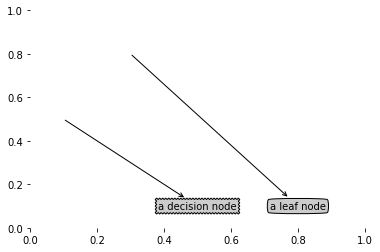

In [60]:
createPlot()

In [81]:
#identifying the no of leaves in a tree and the depth 
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:   numLeafs +=1
    return numLeafs
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:   thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth


In [77]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}]
    return listOfTrees[i]

In [78]:
tree1 = retrieveTree(0)

In [66]:
retrieveTree(1)

{'no surfacing': {0: 'no',
  1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}

In [79]:
getNumLeafs(tree1)

3

In [82]:
getTreeDepth(tree1)

2

In [86]:
#the plottree function 

def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

def plotTree(myTree, parentPt, nodeTxt):
    numLeafs = getNumLeafs(myTree)
    getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff),
                cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;
    plotTree(inTree, (0.5,1.0), '')
    plt.show()

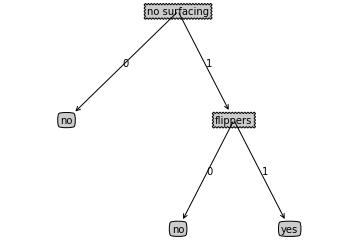

In [87]:
createPlot(tree1)

In [88]:
#classification function for an existing decision tree
def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__=='dict':
                 classLabel = classify(secondDict[key],featLabels,testVec)
            else:   classLabel = secondDict[key]
    return classLabel

In [89]:
myDat,labels=createDataSet()

In [90]:
print(labels)

['no surfacing', 'flippers']


In [92]:
myTree=retrieveTree (0)

In [93]:
print(myTree)

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [94]:
classify(myTree,labels,[1,0])

'no'

In [95]:
classify(myTree,labels,[1,1])

'yes'

In [104]:
#persisting the decision tree with pickle 
def storeTree(inputTree,filename):
            import pickle
            fw = open(filename,'wb') #write in binary mode 
            pickle.dump(inputTree,fw)
            fw.close()
def grabTree(filename):
            import pickle
            fr = open(filename,'rb') #read in binary mode
            return pickle.load(fr)

In [102]:
storeTree(myTree,'classifierStorage.txt')

In [103]:
grabTree('classifierStorage.txt')

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [106]:
#lenses exercise
fr=open('lenses.txt')

In [107]:
lenses=[inst.strip().split('\t') for inst in fr.readlines()]

In [108]:
lensesLabels=['age', 'prescript', 'astigmatic', 'tearRate']

In [109]:
lensesTree = createTree(lenses,lensesLabels)

In [110]:
print(lensesTree)

{'age': {'pre': {'prescript': {'myope': {'astigmatic': {'yes': {'tearRate': {'reduced': 'no lenses', 'normal': 'hard'}}, 'no': {'tearRate': {'reduced': 'no lenses', 'normal': 'soft'}}}}, 'hyper': {'astigmatic': {'yes': 'no lenses', 'no': {'tearRate': {'reduced': 'no lenses', 'normal': 'soft'}}}}}}, 'young': {'tearRate': {'no lenses': 'no lenses', 'hard': 'hard', 'soft': 'soft'}}, 'presbyopic': {'prescript': {'myope': {'astigmatic': {'yes': {'tearRate': {'reduced': 'no lenses', 'normal': 'hard'}}, 'no': 'no lenses'}}, 'hyper': {'astigmatic': {'yes': 'no lenses', 'no': {'tearRate': {'reduced': 'no lenses', 'normal': 'soft'}}}}}}}}


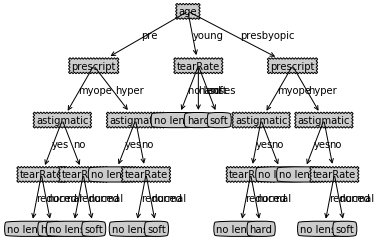

In [111]:
createPlot(lensesTree)